In [1]:
import sklearn
import matplotlib.pyplot as plt
import cv2
from pathlib import Path
import os
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
cd "/content/drive/MyDrive/Data_AI_k20"

/content/drive/MyDrive/Data_AI_k20


In [4]:
ls

Ai/    Han/    LamVu/   phi/   Tan/   Thoai/
Dang/  Hoang/  Nguyen/  Phuc/  Tanh/  Thuong/


In [5]:
# preprocessing
link = "/content/drive/MyDrive/Data_AI_k20/"
face_names = os.listdir(link)
face_path = []
for face_name in face_names:
  face_path.append(os.path.join(link, face_name))
print(face_names)
X = []
y = []
for i in range(len(face_path)):
  print(face_names[i])
  img_path = list(Path(face_path[i]).glob("*"))
  for j in img_path:
    img = plt.imread(j)
    img = cv2.resize(img, (128, 128))
    img.astype('float32')
    img = img/255
    X.append(img)
    y.append(i)

['Phuc', 'Tan', 'Thoai', 'Tanh', 'Thuong', 'Han', 'Ai', 'Dang', 'Nguyen', 'phi', 'LamVu', 'Hoang']
Phuc
Tan
Thoai
Tanh
Thuong
Han
Ai
Dang
Nguyen
phi
LamVu
Hoang


In [6]:
X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)

(1157, 128, 128, 3)
(1157,)


In [7]:
from keras.utils import to_categorical
y = to_categorical(y)
print(y.shape)

(1157, 12)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
from keras import models, layers
from keras.layers import Flatten, Dense, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils 
model = models.Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3),padding = 'same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding = 'same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding = 'same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Flatten(input_shape=[128, 128, 3]))
model.add(Dense(1000, activation='relu'))
model.add(Dense(3000, activation='relu'))
model.add(Dense(2000, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(len(face_names), activation='softmax'))
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0

In [12]:
model.fit(X_train, y_train, epochs=50, batch_size=128)

Epoch 1/50
8/8 [==============================] - 40s 5s/step - loss: 1.2353 - accuracy: 0.6022
Epoch 2/50
8/8 [==============================] - 41s 5s/step - loss: 1.0207 - accuracy: 0.7081
Epoch 3/50
8/8 [==============================] - 40s 5s/step - loss: 0.7635 - accuracy: 0.7676
Epoch 4/50
8/8 [==============================] - 42s 5s/step - loss: 1.5789 - accuracy: 0.5535
Epoch 5/50
8/8 [==============================] - 40s 5s/step - loss: 0.6395 - accuracy: 0.8130
Epoch 6/50
8/8 [==============================] - 38s 5s/step - loss: 0.2580 - accuracy: 0.9168
Epoch 7/50
8/8 [==============================] - 40s 5s/step - loss: 0.3444 - accuracy: 0.9092
Epoch 8/50
8/8 [==============================] - 40s 5s/step - loss: 0.3462 - accuracy: 0.8854
Epoch 9/50
8/8 [==============================] - 44s 5s/step - loss: 0.1725 - accuracy: 0.9459
Epoch 10/50
8/8 [==============================] - 40s 5s/step - loss: 0.1591 - accuracy: 0.9611
Epoch 11/50
8/8 [======================

201/232
1/1 [==============================] - 0s 279ms/step
Predict: Hoang  (100%)
True_label:  Hoang


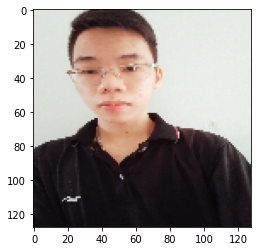

In [13]:
n = 201
print(f'{n}/{len(y_test)}')
plt.imshow(X_test[n])
pred = model.predict(X_test[n].reshape((1, 128, 128, 3)))
print(f'Predict: {face_names[pred.argmax()]}  ({int(pred[0][pred.argmax()]*100)}%)')
print('True_label: ', face_names[y_test[n].argmax()])